In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy
import cv2
import os
from random import shuffle
Train_Dir = './imageFolder/'
Test_Dir = './test_image/'

In [2]:
def label_image(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 1
    elif word_label == 'dog': return 0

In [3]:
def create_train_data():
    train_data = []
    label_list = []
    for img in os.listdir(Train_Dir):
        label  = label_image(img)
        label_list.append([label])
        path = os.path.join(Train_Dir,img)
        image = np.array(ndimage.imread(path, flatten=False))
        my_image = scipy.misc.imresize(image, size=(64,64))
        train_data.append((my_image/255).reshape(64*64*3,1))
    ma = np.array(train_data).reshape(len(os.listdir(Train_Dir)),64*64*3)   #104,12288
    la = np.array(label_list)
    return ma,la
        
#         label = label_image(img)
#         path = os.path.join(Train_Dir,img)
#         img = cv.resize(cv.imread(path,0),(50,50))
#         train_data.append([np.array(img),np.array(label)])
#     shuffle(train_data)
#     np.save('train_data.npy',train_data)
#     return train_data

In [33]:
# def label_img1(img):
#     word_label = img.split('.')[-3]
#     # conversion to one-hot array [cat,dog]
#     #                            [much cat, no dog]
#     if word_label == 'cat': return [1,0]
#     #                             [no cat, very doggo]
#     elif word_label == 'dog': return [0,1]

In [39]:

# training_data = []
# for img in os.listdir(Train_Dir):
#     label = label_img1(img)
#     path = os.path.join(Train_Dir,img)
#     img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (64,64))
#     training_data.append([np.array(img),np.array(label)])
# shuffle(training_data)
# print(training_data[0])

[array([[184, 192, 196, ...,  40,  41,  37],
       [188, 193, 199, ...,  42,  39,  37],
       [197, 196, 199, ...,  42,  42,  39],
       ...,
       [217, 221, 220, ...,  34,  35,  27],
       [219, 223, 220, ...,  36,  37,  26],
       [219, 221, 220, ...,  41,  36,  26]], dtype=uint8), array([1, 0])]


In [4]:
ma,la = create_train_data()

print(ma.shape)
print(la.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ma,la,test_size=0.3,random_state=0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


(736, 12288)
(736, 1)


In [5]:

m_train = X_train.shape[0]
num_px = 64
m_test = X_test.shape[0]
                           
                           
# Reshape the training and test examples 
train_x_flatten = X_train.T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.T

# Standardize data to have feature values between 0 and 1.
# train_x = train_x_flatten/255.
# test_x = test_x_flatten/255.

In [6]:
def sigmoid(z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    A = 1 / (1 + np.exp(-z))
    cache = z
    return A, cache

In [7]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    s = 1 / (1 + np.exp(-Z));
    dZ = dA * s * (1 - s);
    return dZ

In [8]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    A = np.maximum(0,Z)
    cache = Z
    return A, cache

In [9]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ

In [1]:
def initialize_parameters_deep(layerdim):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    params = {}
    L = len(layerdim)
    
    for l in range(1,L):
        params["W"+str(l)] = np.random.randn(layerdim[l],layerdim[l-1]) * (np.sqrt(2/layerdim[l-1]))
        params["b"+str(l)] = np.zeros((layerdim[l],1))
    
    return params

In [11]:
def linear_forward(A,W,b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A)+b
    cache = (A,W,b)
    return Z, cache

In [12]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache,activation_cache)
    
    return A, cache

In [13]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    for l in range(1, L):
        A_prev = A 
        A, linear_activation_cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu");
        caches.append(linear_activation_cache);

    AL, linear_activation_cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid");
    caches.append(linear_activation_cache);

    return AL, caches;

In [14]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1];
    cost =  (np.sum(np.multiply(Y,np.log(AL))+np.multiply((1-Y),np.log(1-AL)))) / (-1*m)
 
    
    return cost;

In [15]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache;
    m = A_prev.shape[1];


    dW = 1 / m * np.dot(dZ, A_prev.T);
    db = 1 / m * np.sum(dZ, axis = 1, keepdims = True);
    dA_prev = np.dot(W.T, dZ);

    return dA_prev, dW, db;

In [16]:
def linear_activation_backward(dA, cache, activation):
    
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache);
        dA_prev, dW, db = linear_backward(dZ, linear_cache);

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache);
        dA_prev, dW, db = linear_backward(dZ, linear_cache);

    return dA_prev, dW, db;

In [17]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {};
    L = len(caches); # the number of layers
    m = AL.shape[1];
    Y = Y.reshape(AL.shape); # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL));

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    dA_prev, dW, db = linear_activation_backward(dAL, caches[L - 1], "sigmoid");
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = dA_prev, dW, db;
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 

        dA = dA_prev;
        dA_prev, dW, db = linear_activation_backward(dA, caches[l], "relu");
        grads["dA" + str(l + 1)] = dA_prev;
        grads["dW" + str(l + 1)] = dW;
        grads["db" + str(l + 1)] = db;

    return grads;

In [18]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
  
    for l in range(L):
        parameters["W" + str(l + 1)] -= learning_rate * grads["dW" + str(l + 1)];
        parameters["b" + str(l + 1)] -= learning_rate * grads["db" + str(l + 1)];

    return parameters;

In [19]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [20]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X,parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 183839.951148
Cost after iteration 100: 183838.545294
Cost after iteration 200: 183837.579590
Cost after iteration 300: 183836.916255
Cost after iteration 400: 183836.460613
Cost after iteration 500: 183836.147628
Cost after iteration 600: 183835.932635
Cost after iteration 700: 183835.784953
Cost after iteration 800: 183835.683508
Cost after iteration 900: 183835.613825
Cost after iteration 1000: 183835.565958
Cost after iteration 1100: 183835.533078
Cost after iteration 1200: 183835.510492
Cost after iteration 1300: 183835.494977
Cost after iteration 1400: 183835.484320
Cost after iteration 1500: 183835.477000
Cost after iteration 1600: 183835.471971
Cost after iteration 1700: 183835.468517
Cost after iteration 1800: 183835.466144
Cost after iteration 1900: 183835.464514
Cost after iteration 2000: 183835.463395
Cost after iteration 2100: 183835.462626
Cost after iteration 2200: 183835.462098
Cost after iteration 2300: 183835.461735
Cost after iteration 2400: 1

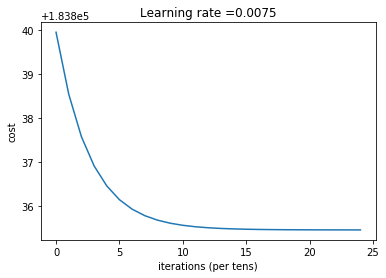

In [21]:
parameters = L_layer_model(train_x_flatten, y_train, layers_dims, num_iterations = 2500, print_cost = True)

In [22]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    AL, cache = L_model_forward(X,parameters)
    predictions = np.zeros((1,X.shape[1]))
    print(AL)
    for i in range(AL.shape[1]):
        if AL[0,i] >0.5:
            predictions[0,i] = 1
        else:
            predictions[0,i] = 0
    
    return predictions

In [23]:
predict(parameters,test_x_flatten)
# parameters
# y_test

[[0.50288568 0.50288641 0.50288587 0.50288614 0.50288699 0.50288559
  0.50288651 0.50288535 0.50288593 0.50288626 0.50288479 0.50288477
  0.50288568 0.5028846  0.50288705 0.50288785 0.50288611 0.5028847
  0.50288718 0.50288429 0.50288607 0.50288637 0.50288609 0.50288576
  0.50288672 0.50288876 0.50288503 0.50288509 0.50288764 0.50288606
  0.50288518 0.50288638 0.50288519 0.50288845 0.50288674 0.50288636
  0.50288591 0.50288727 0.50288491 0.50288418 0.50288782 0.50288706
  0.50288619 0.50288571 0.50288672 0.50288742 0.50288582 0.50288599
  0.50288587 0.50288634 0.50288586 0.5028842  0.5028872  0.50288461
  0.50288621 0.50288577 0.50288674 0.50288726 0.50288605 0.50288567
  0.50288493 0.50288629 0.50288648 0.50288475 0.50288532 0.50288735
  0.50288675 0.50288925 0.50288687 0.50288667 0.50288668 0.50288608
  0.50288465 0.50288539 0.50288563 0.50288427 0.50288724 0.50288701
  0.50288493 0.5028863  0.50288595 0.50288847 0.50288745 0.50288546
  0.50288588 0.50288637 0.50288599 0.50288709 0.5

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [30]:
my_image = "tulika_photo.jpg"
path = os.path.join(Test_Dir,my_image)
image = np.array(ndimage.imread(path, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))
my_im = (my_image/255).reshape(64*64*3,1)
mimage = np.array(my_im).reshape(1,64*64*3)   #104,12288

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


(1, 12288)

In [32]:
predict(parameters,mimage.T)

[[0.50288827]]


array([[1.]])